# Classsification of Heart Disease

## Introduction
One of the most common health conditions throughout the world is heart disease.  Atherosclerosis, manifesting as vessel narrowing or vessel stenosis, occurs due to an accumulation of fat within the blood vessels of the heart. Narrowing of blood vessels usually implies a higher risk of some kinds of heart disease (Malota et al., 2018), and this vessel stenosis is likely related to several factors such as age, blood pressure, and serum cholesterol levels.
Heart problems are common in older adults due to aging arteries. Aging change in arteries usually presents as a reduced elasticity on the large blood vessels related to atherosclerosis resulting in high blood pressure. Aging also results in other health risks, such as limits to blood flow and decreased heart chamber capacity (*Heart Health and Aging*, n.d.). Research on aging arteries and heart by Lakatta and Levy (2003) demonstrates that although heart-related aging may not directly cause heart disease, it leads to increased vulnerability and weakness of the heart, increasing the risk of heart disease.Blood pressure can reflect the health of blood vessels. High blood pressure reduces the supply of blood and oxygen to the heart, and insufficient oxygen levels in the blood may cause heart attacks and heart failure (*High Blood Pressure Symptoms, Causes, and Problems | cdc.gov*, 2021). According to the research on the relation between blood pressure and coronary heart disease in different ages by Franklin et al. (2001), diastolic blood pressure is considered an efficient predictor for this heart disease in people under 50 years old, and other types of blood pressure are also associated with the risks of heart disease in patients with other ages. On the other hand, serum cholesterol values can indicate potential blood flow restrictions in blood vessels (*Warning Signs and Symptoms of Heart Disease*, n.d. & Malota et al., 2018). Law et al. (1994) conclude a possible strong and positive relationship between the value of serum cholesterol and the risk of heart disease by investigating the effect of lower serum cholesterol levels on the probability of heart disease. Law's team provides details about the benefit of lowering serum cholesterol levels in people above 40 years old. A 10% decrease in serum cholesterol will drop the probability of ischaemic heart disease by a range from approximately 20% to 50% depending on age.It seems that the patient's age, resting blood pressure, and serum cholesterol level are closely relevant to heart disease. So, what is the predictive value of these three variables on vessel stenosis? To answer the question, this project will conduct a classification prediction on the vessel stenosis status with a random dataset *Reprocessed Hungarian* (Machine Learning Repository, 1988) which contains all the required variables above.

## Methods & Results
>- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
>- your report should include code which:
    - loads data from the original source on the web 
    - wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis 
    - note: all tables and figure should have a figure/table number and a legend

In [2]:
# Load libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.4     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Initial Data Cleaning
First, we must download the dataset from the web into R. Since the dataset has no column names, they must be manually set in accordance with the [dataset website](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

In [127]:
# Read data from source into R
heart_data_raw <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data",
                                delim = " ",
                                col_names = FALSE)
# Map column names
colnames(heart_data_raw) <- c("age", 
                              "sex", 
                              "cp", 
                              "trestbps", 
                              "chol", 
                              "fbs", 
                              "restecg",
                              "thalach", 
                              "exang", 
                              "oldpeak", 
                              "slope", 
                              "ca", 
                              "thal", 
                              "num")

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Table 1.1

In [128]:
head(heart_data_raw)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
39,1,3,120,339,0,0,170,0,0.0,-9,-9,-9,0


You may notice that some columns have an array of values which seem invalid, such as sex being an integer, or cholesterol levels being -9. This data is thus untidy since the values are not representitive of their actual meanings. First, we will perform the mappings of each column which number their factors (such as sex with 0 meaning female and 1 meaning male).

In [90]:
heart_data_recoded <- heart_data_raw |>
    mutate(sex = recode(sex, 
                        `0` = "female", 
                        `1` = "male")) |>
    mutate(cp = recode(cp, 
                       `1` = "typical angina",
                       `2` = "atypical angina",
                       `3` = "non-anginal pain",
                       `4` = "asymptomatic")) |>
    mutate(fbs = recode(fbs, 
                        `0` = FALSE, 
                        `1` = TRUE)) |>
    mutate(restecg = recode(restecg, 
                            `0` = "normal", 
                            `1` = "abnormality", 
                            `2` = "ventricular hypertrophy")) |>
    mutate(exang = recode(exang, 
                          `0` = FALSE, 
                          `1` = TRUE)) |>
    mutate(slope = recode(slope, 
                          `1` = "upsloping",
                          `2` = "flat",
                          `3` = "downsloping")) |>
    mutate(ca = ifelse(ca < 0, NA, ca)) |>
    mutate(thal = recode(thal, 
                         `3` = "normal", 
                         `6` = "fixed defect", 
                         `7` = "reversable defect")) |>
    mutate(num = as_factor(recode(num, 
                        `0` = "<50% narrowing", 
                        `1` = ">50% narrowing")))

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `fbs = recode(fbs, `0` = FALSE, `1` = TRUE)`.
Caused by warning:
! Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`."
Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `restecg = recode(restecg, `0` = "normal", `1` = "abnormality",
  `2` = "ventricular hypertrophy")`.
Caused by warning:
! Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`."
Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `exang = recode(exang, `0` = FALSE, `1` = TRUE)`.
Caused by warning:
! Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`."
Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `slope = recode(slope, `1` = "upsloping", `2` = "flat", `3` =
  "downsloping")`.
Caused by warning:

Then, we will replace invalid values (indicated by a -9 or out of range) with NA.

In [129]:
heart_data <- heart_data_recoded |>
    mutate(chol = ifelse(chol < 0, NA, chol)) |>
    mutate(thalach = ifelse(thalach < 0, NA, thalach)) |>
    mutate(age = ifelse(age < 0, NA, age)) |>
    mutate(trestbps = ifelse(trestbps < 0, NA, age))

#### Table 1.2

In [130]:
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,male,atypical angina,40,289,FALSE,normal,172,FALSE,0.0,NA,NA,NA,<50% narrowing
49,female,non-anginal pain,49,180,FALSE,normal,156,FALSE,1.0,flat,NA,NA,>50% narrowing
37,male,atypical angina,37,283,FALSE,abnormality,98,FALSE,0.0,NA,NA,NA,<50% narrowing
48,female,asymptomatic,48,214,FALSE,normal,108,TRUE,1.5,flat,NA,NA,NA
54,male,non-anginal pain,54,NA,FALSE,normal,122,FALSE,0.0,NA,NA,NA,<50% narrowing
39,male,non-anginal pain,39,339,FALSE,normal,170,FALSE,0.0,NA,NA,NA,<50% narrowing


In order to train our model, we cannot have anything in our predictor columns be NA, so these rows will be removed.

In [131]:
heart_data <- heart_data |>
    filter(!is.na(num) & !is.na(chol) & !is.na(trestbps) & !is.na(age))

Now we will split the data into training and testing sets to ensure our analysis and model can be tested against data it has not seen.

In [132]:
set.seed(45678)

heart_data_split <- initial_split(heart_data, prop = 0.7, strata = num)
heart_training <- training(heart_data_split)
heart_testing <- testing(heart_data_split)

### Exploratory Data Analysis
Now we will get a rough idea of some of the relationships in our data.

First, we will see how many individuals are charactarized with each chest pain type to get an idea of how many symptomatic individuals we are dealing with in the dataset.

#### Table 2.1

In [133]:
chest_pain_counts <- count(heart_training, cp) |>
    mutate(total = n) |>
    select(-n)
chest_pain_counts

cp,total
<chr>,<int>
asymptomatic,46
atypical angina,59
non-anginal pain,33
typical angina,5


Next, we will look at the number of regular and irregular ECG readings from individuals in the dataset.

#### Table 2.2

In [134]:
restecg_counts <- count(heart_training, restecg) |>
    mutate(total = n) |>
    select(-n)
restecg_counts

restecg,total
<chr>,<int>
abnormality,18
normal,120
ventricular hypertrophy,5


Now we will look at only individuals with abnormal ECG results; by contrasting the chest pain type versus the total amount, we can get an idea of relationships between ECG type and chest pain. As well, we will compare the type of chest pain versus the total chest pain count for all individuals.

#### Table 2.3

In [135]:
abnormal_restecg_chest_pain_counts <- heart_training |>
    filter(restecg == "abnormality") |>
    count(cp) |>
    bind_cols(select(chest_pain_counts, total)) |>
    mutate(percent_total = n / total * 100)
abnormal_restecg_chest_pain_counts

cp,n,total,percent_total
<chr>,<int>,<int>,<dbl>
asymptomatic,6,46,13.04348
atypical angina,6,59,10.16949
non-anginal pain,5,33,15.15152
typical angina,1,5,20.00000


We can get an idea of the relationship between age and resting ECG abormality by plotting a distribution of resting ECG results against age.

In [136]:
options(repr.plot.height = 5, repr.plot.width = 10)

age_vs_ecg_plot <- heart_training |>
    filter(!is.na(restecg)) |>
    ggplot(aes(x = age, fill = as_factor(restecg))) +
    geom_histogram(position = "identity", binwidth = 1) +
    labs(fill = "Resting ECG Abnormality") +
    xlab("Age") +
    ylab("Count") +
    ggtitle("Age Distribution and Resting ECG Abnormality")

#### Figure 2.4

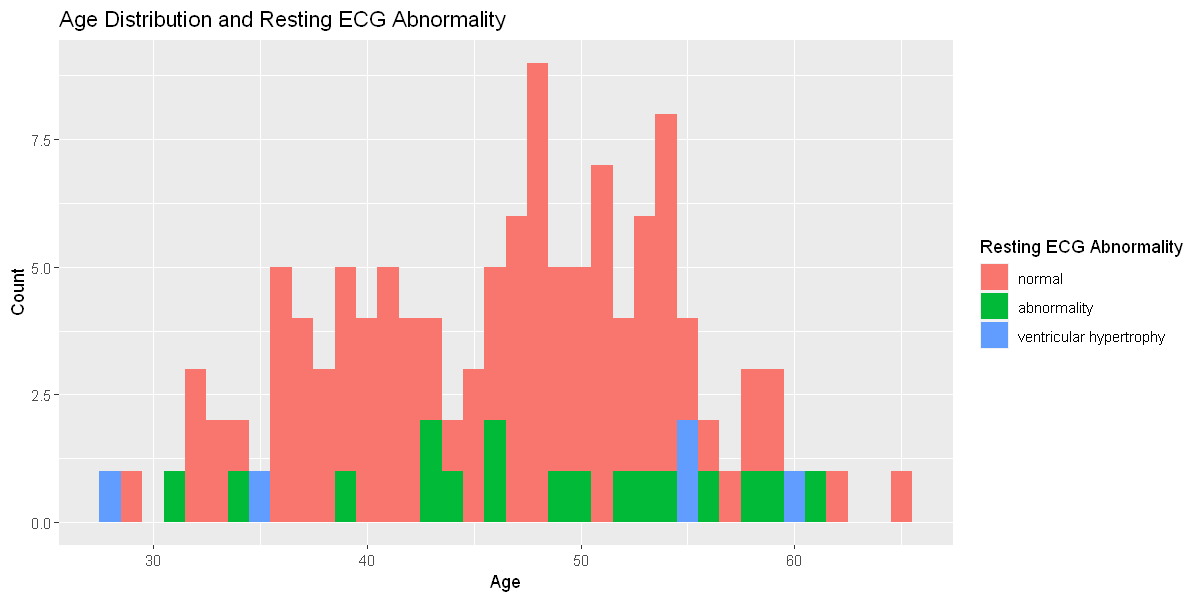

In [138]:
age_vs_ecg_plot

A couple things are revealed in this graph; firstly, our dataset is primarily older indivuduals. Second, there appears to be a slight positive correlation between abnormality and age.

Now, we will attempt to see if there is a relationship between serum cholesterol and resting blood pressure. We would expect there to be a positive correlation as there is often a stigma between high cholesterol and high blood pressure. This will be done in a scatterplot:

In [139]:
options(repr.plot.height = 5, repr.plot.width = 9)

chol_vs_rhr_plot <- heart_training |>
    ggplot(aes(x = chol, y = trestbps, color = cp)) +
    geom_point() +
    xlab("Serum Cholesterol (mg/dL)") +
    ylab("Resting Blood Pressure (mm Hg)") +
    labs(color = "Chest Pain Type") +
    ggtitle("Serum Cholesterol vs Resting Blood Pressure")

#### Figure 2.5

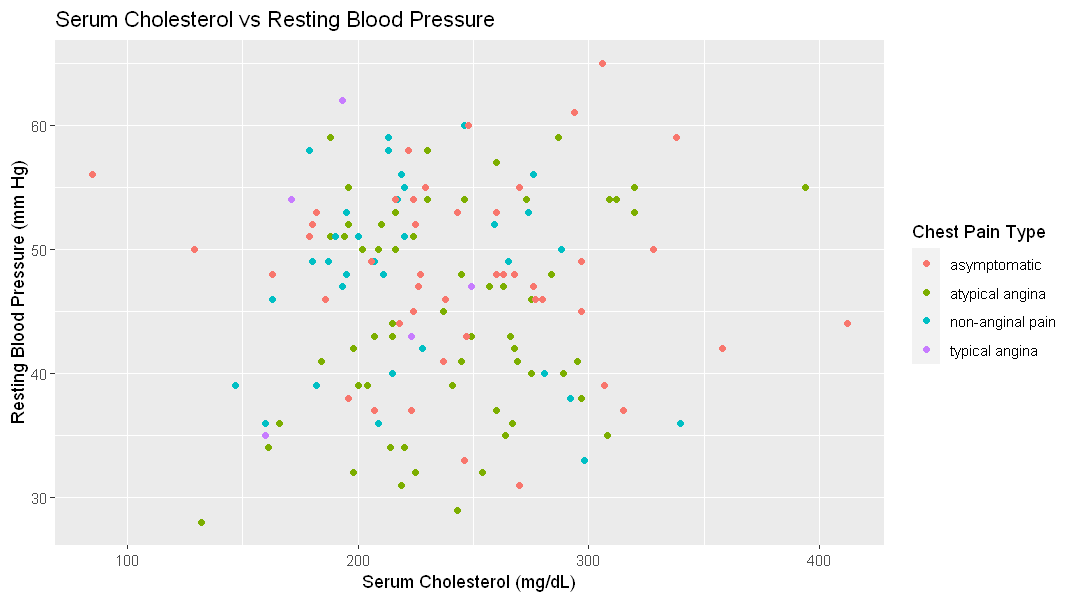

In [140]:
chol_vs_rhr_plot

The resulting plot seems somewhat inconlusive, but there may be a slight positive correlation between the two variables.

### Model Setup
First we will create the recipe for our classification model with our actual value being vessicle narrowing (num), and the predicors being age, chest pain type (cp), resting blood pressure (trestbps), and serum cholesterol (chol). Then, we will scale and center all predictors to ensure that euclidean distance is calculated properly across variables.

In [141]:
# Create recipe to predict num based on age, trestbps, and chol
heart_recipe <- recipe(num ~ age + trestbps + chol, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

Now to make the specification and workflow objects for our model using 5-fold cross validation.

In [142]:
# Create vfold for cross-validation
heart_vfold <- vfold_cv(heart_training, v = 5, strata = num)

# Create model specification set to tune for an optimal K value
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Create a tibble for k-vals to test
k_vals <- tibble(neighbors = 1:15)

# Get model resuklts
knn_results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics()

# Filter for accuracy only
accuracies <- knn_results |>
    filter(.metric == "accuracy")

#### Table 3.1

In [146]:
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7406404,5,0.025542240,Preprocessor1_Model01
2,accuracy,binary,0.7406404,5,0.025542240,Preprocessor1_Model02
3,accuracy,binary,0.7901478,5,0.025147289,Preprocessor1_Model03
4,accuracy,binary,0.7901478,5,0.025147289,Preprocessor1_Model04
5,accuracy,binary,0.7975369,5,0.019302395,Preprocessor1_Model05
6,accuracy,binary,0.7975369,5,0.019302395,Preprocessor1_Model06
7,accuracy,binary,0.8113300,5,0.023070681,Preprocessor1_Model07
8,accuracy,binary,0.8113300,5,0.023070681,Preprocessor1_Model08
9,accuracy,binary,0.8182266,5,0.006429940,Preprocessor1_Model09


In order to see which k-val we should use, we will plot these accuracies against their k-vals.

In [147]:
options(repr.plot.height = 5, repr.plot.width = 9)

accuracy_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbor Count (K)", y = "Cross-validated Accuracy Estimate") +
    ggtitle("Model Accuracy for K Values 1-20") +
    ylim(0, 1) +
    theme(text = element_text(size = 15))

#### Figure 3.2

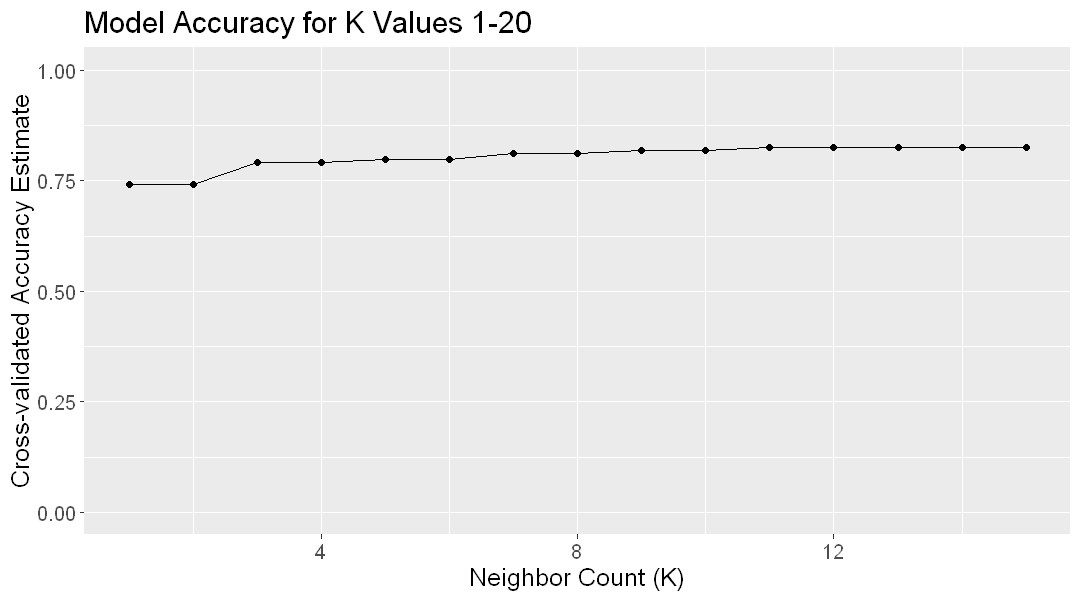

In [148]:
accuracy_plot

Here it can be seen that the most effective number of neighbors while still maintaining reasonable efficiency would be with $k = 3$.

Finally, we can create our final model with $k=3$.

In [149]:
# Create tuned specification
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

# Create fit model on training data
knn_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec_tuned) |>
    fit(data = heart_training)

And now we can test our model with the testing data split we created earlier.

In [116]:
# Predict and bind to original data frame
heart_test_predictions <- predict(knn_fit, heart_testing) |>
    bind_cols(heart_testing)

# View accuracy
heart_test_accuracy <- heart_test_predictions |>
    metrics(truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)

heart_test_accuracy

[1] 0.7777778

Thus, our model has a ~78% accuracy on testing data.

Now to see which results were predicted incorrectly with a confusion matrix.

#### Table 3.3

In [150]:
# View confusion matrix
confusion <- heart_test_predictions |>
    conf_mat(truth = num, estimate = .pred_class)
confusion

                Truth
Prediction       <50% narrowing >50% narrowing
  <50% narrowing             47             10
  >50% narrowing              4              2

Our results indicate that our model predicts >50% narrowing more often, meaning it will more often say that a patient is likely to have heart disease when they don't rather than the inverse.

## Discussion
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

## References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
- Make sure to cite the source of your data as well.